- read product (phone) and review data from mySQL database using peewee model
- remove 'id' column, drop duplicate entries due if script was run multiple times
- There are 30362 reviews

In [197]:
from db import *
import pandas as pd
review = Review()
product = Product()

review_records = review.select()
product_records = product.select()

review_df = pd.DataFrame(list(review_records.dicts())).drop(columns='id')
print(review_df.shape)
print(review_df.head())
product_df = pd.DataFrame(list(product_records.dicts())).drop(columns='id').drop_duplicates()
print(product_df.head())
print(product_df.shape)

(30362, 10)
       date_published  helpful  rating recommending      skuId    store  \
0 2019-01-18 08:58:08     8967       5         True  MT6F2LL/A  verizon   
1 2019-02-17 08:58:08     1354       5         True  MT6F2LL/A  verizon   
2 2019-01-18 08:58:08     1044       5         True  MT6F2LL/A  verizon   
3 2019-02-17 08:58:08      363       5         True  MT6F2LL/A  verizon   
4 2018-12-19 08:58:08      672       5         True  MT6F2LL/A  verizon   

                                                                                                                                                                                                      text  \
0  I'm coming from the iPhone X. The XS Max is much faster! I was worried about the size but due to I've never had any of the plus iPhones. It didn't take my long to get used to it! It does fit great...   
1  Loving the new iPhone XS Max so far. The screen is amazing, sound is awesome and the camera is out of this world. Battery 

In [198]:
pd.set_option('display.max_columns',20)
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
plt.style.use('ggplot')
plt.scatter
print(review_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30362 entries, 0 to 30361
Data columns (total 10 columns):
date_published    30362 non-null datetime64[ns]
helpful           30362 non-null int64
rating            30362 non-null int64
recommending      30362 non-null object
skuId             30362 non-null object
store             30362 non-null object
text              30362 non-null object
title             30362 non-null object
unhelpful         30362 non-null int64
username          30362 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 2.3+ MB
None


In [199]:
print(product_df.columns)


Index(['brand', 'color', 'price', 'product_name', 'skuId', 'spec_name',
       'spec_value', 'storage', 'store'],
      dtype='object')


- trim phone model name to 20 characters
- average phone price per model

In [200]:
product_df['product_name']=product_df['product_name'].apply(lambda x: x[:20].strip())
avg_price= product_df.groupby('product_name')['price'].mean().sort_values(ascending=False)
print(avg_price.shape)
avg_price

(40,)


product_name
RED HYDROGEN One        1295.000000
Apple iPhone XS Max     1266.656667
Apple iPhone XS         1166.656667
Samsung Galaxy Note9    1124.990000
Samsung Galaxy S10      1024.990000
Samsung Galaxy S10+      999.990000
Google Pixel 3 XL        979.990000
LG V40 ThinQ™            979.990000
Apple iPhone X           974.990000
Google Pixel 2 XL        899.990000
Google Pixel 3           849.990000
LG G8 ThinQ™             840.000000
Apple iPhone XR          816.656667
Samsung Galaxy S10e      799.990000
LG G7 ThinQ™             750.000000
Apple iPhone 8 Plus      707.323333
Samsung Galaxy S9+       699.990000
Apple iPhone 8           674.990000
Apple iPhone X (Cert     622.990000
Apple iPhone 7 Plus      614.660000
Samsung Galaxy S9        599.990000
Samsung Galaxy S8        499.990000
Apple iPhone 6s Plus     499.990000
Apple iPhone 7           499.990000
Motorola moto z3         480.000000
Apple iPhone 8 (Cert     473.990000
Kyocera DuraForce PR     444.000000
Apple iPhone 6s

Text(0, 0.5, 'Price')

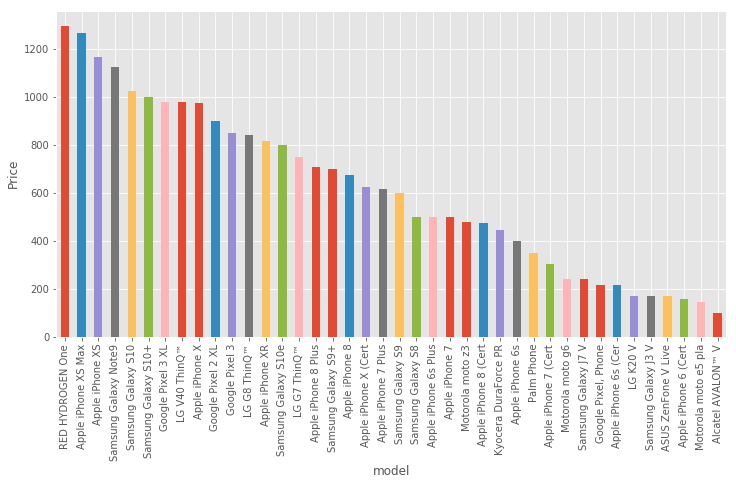

In [201]:
avg_price.plot.bar()
plt.xlabel('model')
plt.ylabel('Price')

- creat a df contains all review columns, product_name and average price from product table
- convert 'recommending' to boolean type, fill '' with 0
- filter out models with less than 10 reviews

In [212]:
product=product_df[['skuId','product_name']].drop_duplicates()
print(product.shape)
print(review_df[['skuId']].drop_duplicates().shape)
df = review_df.merge(product, how='inner', on='skuId')
df =df.merge(
    avg_price.reset_index(), how='inner', on='product_name').groupby(
    'skuId').filter(lambda x: x.shape[0]>10)

print(df.shape, review_df.shape)

df['recommending']=df.recommending.apply(lambda x: 1 if x=='True' else 0)




(42, 2)
(36, 1)
(30334, 12) (30362, 10)


- phones with high review numbers tend to be more popular

In [214]:
popular = df['product_name'].value_counts()

popular

Apple iPhone 6s         8767
Apple iPhone 7          6573
Apple iPhone 7 Plus     5810
Apple iPhone 6s Plus    5584
LG G7 ThinQ™             682
Samsung Galaxy S8        392
LG V40 ThinQ™            361
Motorola moto g6         235
Motorola moto z3         200
Google Pixel 2 XL        188
Apple iPhone X           179
Samsung Galaxy Note9     134
LG K20 V                 117
Apple iPhone 8 Plus      103
Samsung Galaxy J7 V      100
Samsung Galaxy J3 V       94
Samsung Galaxy S9+        93
Google Pixel 3            89
Apple iPhone XR           86
Apple iPhone XS Max       83
Google Pixel 3 XL         80
Samsung Galaxy S9         75
Samsung Galaxy S10+       60
ASUS ZenFone V Live       53
Apple iPhone 8            49
Apple iPhone XS           45
Samsung Galaxy S10        40
Kyocera DuraForce PR      28
Samsung Galaxy S10e       23
RED HYDROGEN One          11
Name: product_name, dtype: int64

Text(0, 0.5, 'reviews')

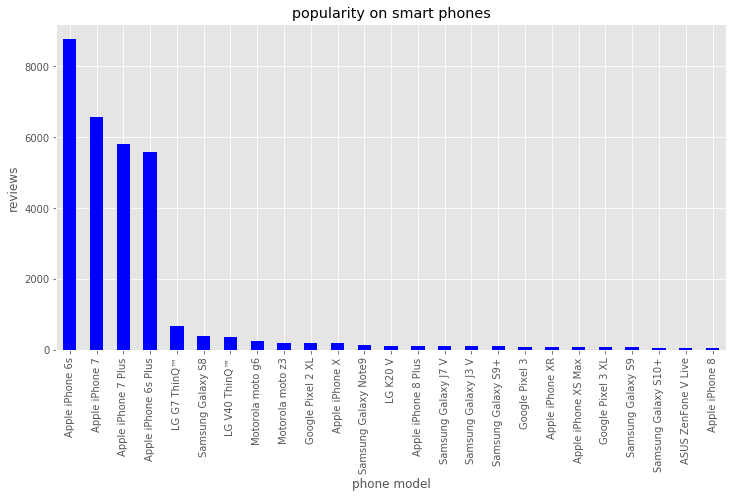

In [215]:

popular[:25].plot(kind='bar', title = 'popularity on smart phones', color='b')
plt.xlabel('phone model')
plt.ylabel('reviews')


In [216]:
df.describe()

,helpful,rating,recommending,unhelpful,price
count,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000
mean,12.698325,4.515692,0.829004,3.466308,516.805418
std,172.668914,0.869223,0.376512,30.081905,141.600994
min,0.000000,1.000000,0.000000,0.000000,168.000000
25%,0.000000,4.000000,1.000000,0.000000,399.990000
50%,0.000000,5.000000,1.000000,0.000000,499.990000
75%,0.000000,5.000000,1.000000,0.000000,614.660000
max,16155.000000,5.000000,1.000000,3973.000000,1295.000000


Text(0.5, 1.0, 'Buy Recommendations Based on Reviews')

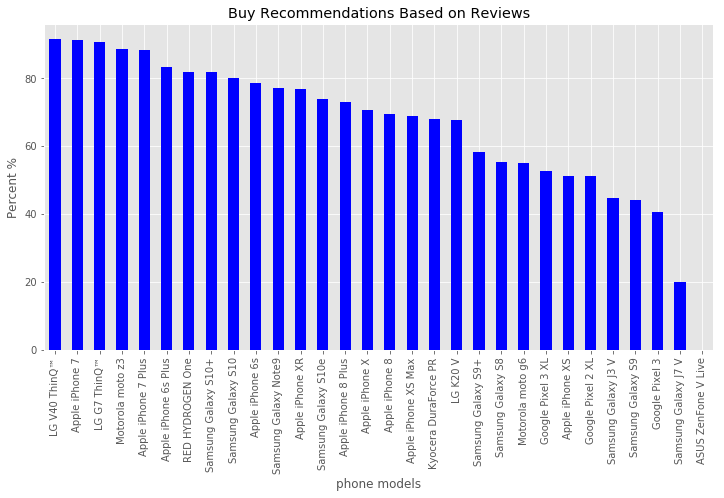

In [217]:
gp = df.groupby('product_name')
pct_recommend = gp['recommending'].apply(lambda x: sum(x ==1)/len(x)*100)
#pct_recommend = new_df['recommending'].apply(lambda x: sum(x =='True')/len(x)*100)
pct_recommend.sort_values(ascending=False).plot.bar(color='b')
plt.xlabel('phone models') 
plt.ylabel('Percent %')
plt.title('Buy Recommendations Based on Reviews')




Text(0.5, 0, 'phone models')

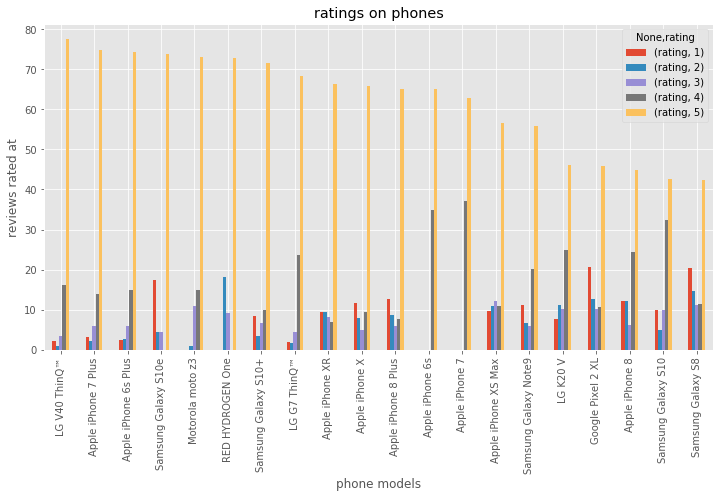

In [218]:

df1 = pd.DataFrame(reviews_h10.groupby('product_name')['rating'].value_counts())

#df1.columns=['review_ratings']
data = df1.unstack()
total = data.apply('sum',axis = 1)
#index_plt = total.index[:30]
data_pct = data.apply(lambda x: x/total * 100).sort_values(by=('rating',5), ascending=False).fillna(0)[:20]
data_pct.plot.bar()

plt.title('ratings on phones')
plt.ylabel('reviews rated at')
plt.xlabel('phone models')


In [250]:
import numpy as np
price_review_grp=df.groupby('product_name')
review_cnt = price_review_grp['rating'].count()
price_review_df=price_review_grp.agg({'price':'max', 'rating':'mean'})
price_review_df['reviews']=review_cnt
print(price_review_df.shape)
print(price_review_df.info())
price_review_df.describe()


(30, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, ASUS ZenFone V Live to Samsung Galaxy S9+
Data columns (total 3 columns):
price      30 non-null float64
rating     30 non-null float64
reviews    30 non-null int64
dtypes: float64(2), int64(1)
memory usage: 960.0+ bytes
None


,price,rating,reviews
count,30.000000,30.000000,30.000000
mean,701.159778,3.743543,1011.133333
std,332.403992,0.823921,2314.568653
min,168.000000,1.056604,11.000000
25%,484.997500,3.402041,63.750000
50%,703.656667,3.932380,97.000000
75%,978.740000,4.318182,226.250000
max,1295.000000,4.659280,8767.000000


- ratings related to price? Not really from this chart!

Text(0.5, 1.0, 'relation between price and average rating on smart phones')

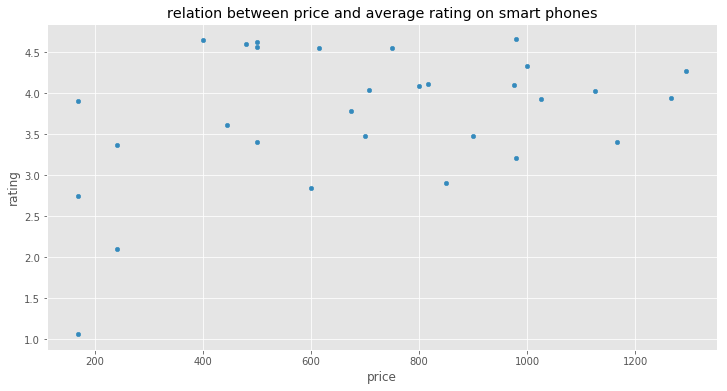

In [251]:
price_review_df.groupby('product_name').apply(np.mean,axis=0).plot.scatter(x='price',y='rating')
plt.title('relation between price and average rating on smart phones')

Text(0.5, 0, 'phone models')

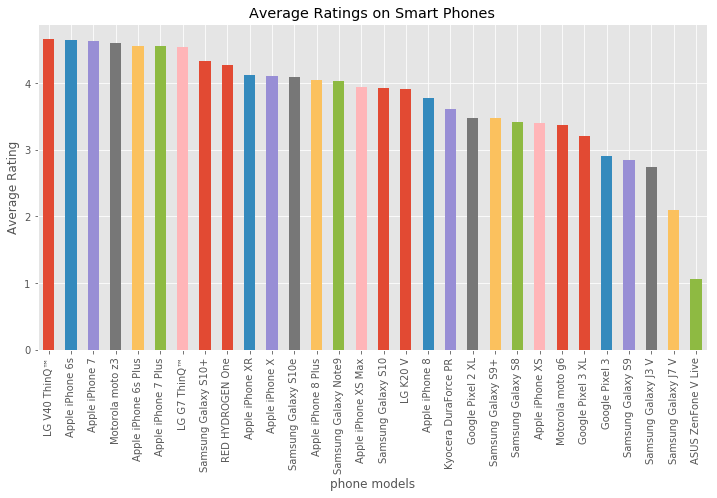

In [252]:
price_review_df['rating'].sort_values(ascending=False).plot.bar(title="Average Ratings on Smart Phones")
plt.ylabel('Average Rating')
plt.xlabel('phone models')



- ratings related to review numbers?

Text(0.5, 1.0, 'Relationship between number of reviews and average ratings')

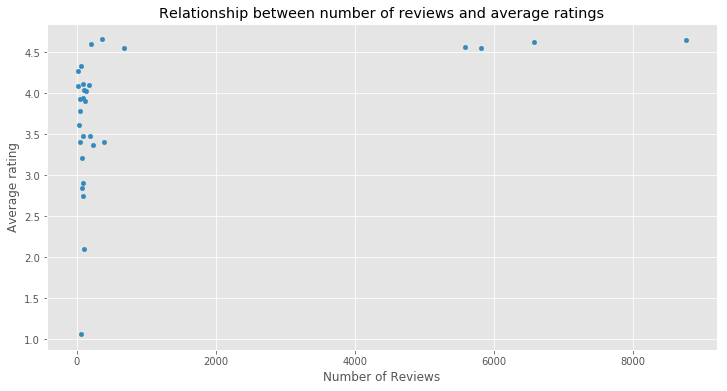

In [253]:
price_review_df.plot.scatter(y='rating', x='reviews')
plt.ylabel('Average rating')
plt.xlabel('Number of Reviews')
plt.title('Relationship between number of reviews and average ratings')

- review numbers related to price?

Text(0.5, 1.0, 'Relations between Price and Review Numbers')

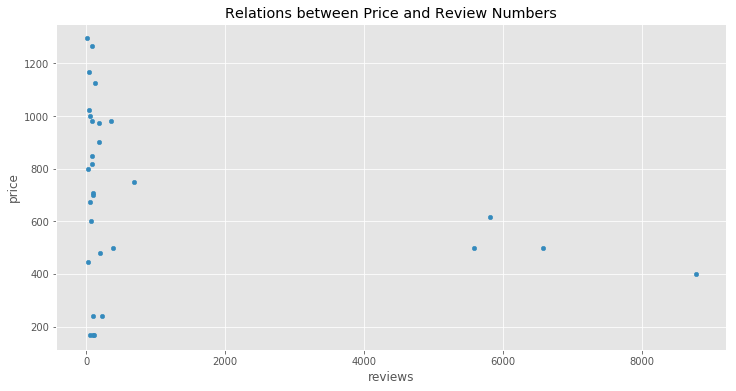

In [254]:
price_review_df.plot.scatter(x='reviews', y='price')
plt.title('Relations between Price and Review Numbers')

- NLP for review text

In [224]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')

In [302]:
df1=df.copy()

- combine title into text

In [303]:
df1.columns
df1['text'] = df1['title'] + ' ' + df1['text'] 

- remove extra space

In [304]:
import re
pd.set_option('max_colwidth',200)
df1['text']=df1['text'].str.lower().apply(lambda x: re.sub('\s+', ' ', x))
df1['text'].sample(10)

14035    my wife and i really like our new iphone 6s plus. this is by far the best iphone that we have used. this is our third generation and it is so much better than what we had before with the version 4...
5299       excellent product my only problem or issue is that , i bought this new iphone 6s last week and i am having drop calls, calls failed and while talking on the phone the other party could not hear me.
11683                                                                                                                                                       happy love it and still learning new things about it
20207                                                                                                   great phone i love my new iphone 7, it is fast and easy to use. i am glad i was able to get one so soon.
2667                                                                                                                                                                

- remove punctuation, following line remove anything that is not word and space

In [305]:
df1['text']=df1['text'].apply(lambda x: re.sub('[^\w\s]','',x))

- use stop word set from library

In [306]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
#stop.extend(['iphone 6s'])
#stop.extend(['im', 'ive', 'iphone', 'x','xs', 'max', 'phone', 'due','still','phones'])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [307]:
df1['text']=df1['text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))

In [308]:
df1['text'].sample(10)

18500                                                                                  new phone 40 months apple i5 took weeks determine time upgrade i5 new i7 truly glad owning i7 10 days found lot better i5
4831                                                                                                                               excellent expected iphone course great thats manufacturers always trying copy
29827          first lg phone first lg phoneive owned big name brand phones far one best runs smooth takes great pics ai works great screen bright cleari could go onbut think u get point great phone definitel
12746              cant go wrong iphone ive using iphoneios 4 years 2nd iphone first 4s lasted 4 years replaced time something bigger better nothing wrong still works itll stick around games music new 6s plus
10557                                                                 pleased 6s plus hesitant ordering 6splus wasnt sure would like larger size love much different

### Word Cloud

In [309]:
from wordcloud import WordCloud

In [310]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(df1['text']))

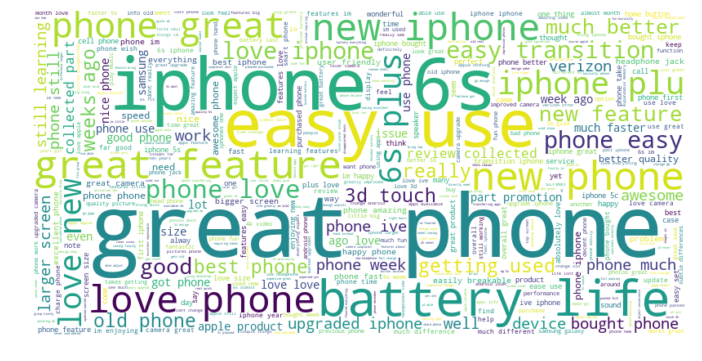

In [311]:
# show
#plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [286]:


def sentiment_func(x):
    sentiment = TextBlob(x['text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = df1.apply(sentiment_func, axis=1)
sample.describe()

,helpful,rating,recommending,unhelpful,price,polarity,subjectivity
count,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000
mean,12.698325,4.515692,0.829004,3.466308,516.805418,0.362443,0.601138
std,172.668914,0.869223,0.376512,30.081905,141.600994,0.244599,0.168002
min,0.000000,1.000000,0.000000,0.000000,168.000000,-1.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,399.990000,0.238748,0.508333
50%,0.000000,5.000000,1.000000,0.000000,499.990000,0.372727,0.602753
75%,0.000000,5.000000,1.000000,0.000000,614.660000,0.500000,0.706667
max,16155.000000,5.000000,1.000000,3973.000000,1295.000000,1.000000,1.000000


Text(0.5, 1.0, 'Relation between Polarity and helpful votes on Reviews ')

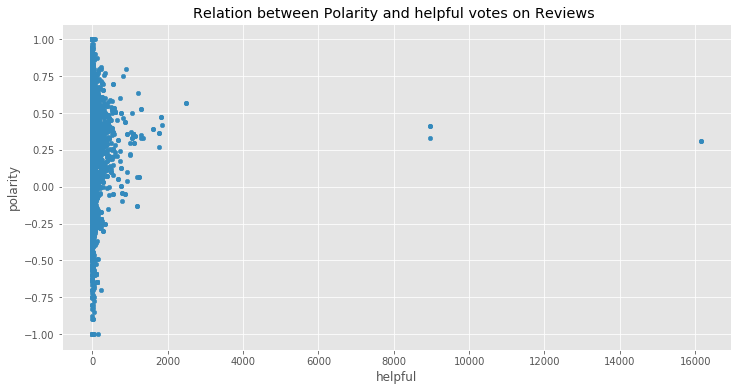

In [285]:
sample.plot.scatter('helpful', 'polarity')
plt.title('Relation between Polarity and helpful votes on Reviews ')

In [275]:
sa_df1 = df1.loc[df1['unhelpful']>0]
sa_df1.shape

(6308, 12)

In [277]:
sample1 = sa_df1.sample(sa_df1.shape[0]).apply(sentiment_func, axis=1)

Text(0.5, 1.0, 'Relation between Polarity and unhelpful votes on Reviews ')

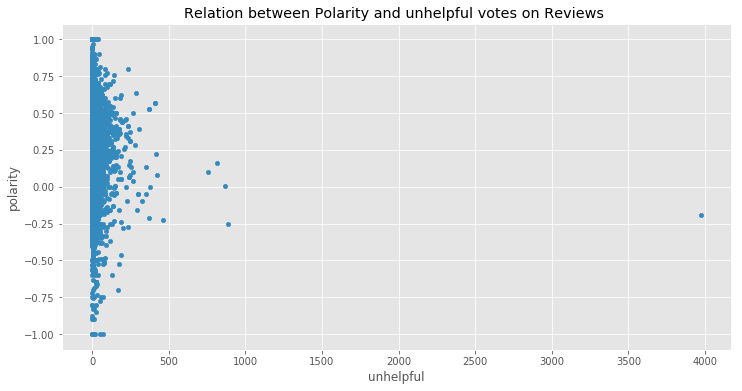

In [279]:
sample1.plot.scatter('unhelpful', 'polarity')
plt.title('Relation between Polarity and unhelpful votes on Reviews ')